Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive')
!pwd

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    validation_split= 0.2,
    label_mode='categorical',
    subset='training',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    seed=123
)
train_ds

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset='validation',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    seed=123
)
val_ds

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [9]:
## Write your test dataset here
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    batch_size=32,
    image_size=(img_height,img_width),
    seed =123
)
test_ds

Found 118 files belonging to 9 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 9)


In [12]:
y_data = np.array(class_names)
y_data.shape

(9,)

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

tf.Tensor(
[[[[160.34445  129.34445  108.344444]
   [163.63333  135.63333  113.63333 ]
   [166.09074  140.62038  117.35555 ]
   ...
   [154.89813  127.898125 100.898125]
   [153.       126.        99.      ]
   [149.34442  122.34442   95.34442 ]]

  [[165.73445  131.03444  110.93445 ]
   [165.09334  134.10333  113.1     ]
   [166.72223  138.92223  116.82222 ]
   ...
   [157.97221  130.97221  103.97221 ]
   [156.       129.       102.      ]
   [156.8      129.8      102.8     ]]

  [[165.83333  128.83333  109.833336]
   [166.02779  134.02779  113.02778 ]
   [170.72223  139.72223  118.72222 ]
   ...
   [156.27783  129.27783  102.27783 ]
   [158.       131.       104.      ]
   [159.9426   132.9426   105.9426  ]]

  ...

  [[160.03525  125.60935   95.3223  ]
   [146.17242  115.172424  94.20576 ]
   [152.06467  125.5091   112.23133 ]
   ...
   [156.8888   128.8888   114.888794]
   [156.33325  128.33325  114.33325 ]
   [145.37393  117.37393  103.37393 ]]

  [[161.20996  131.41003  105.6101

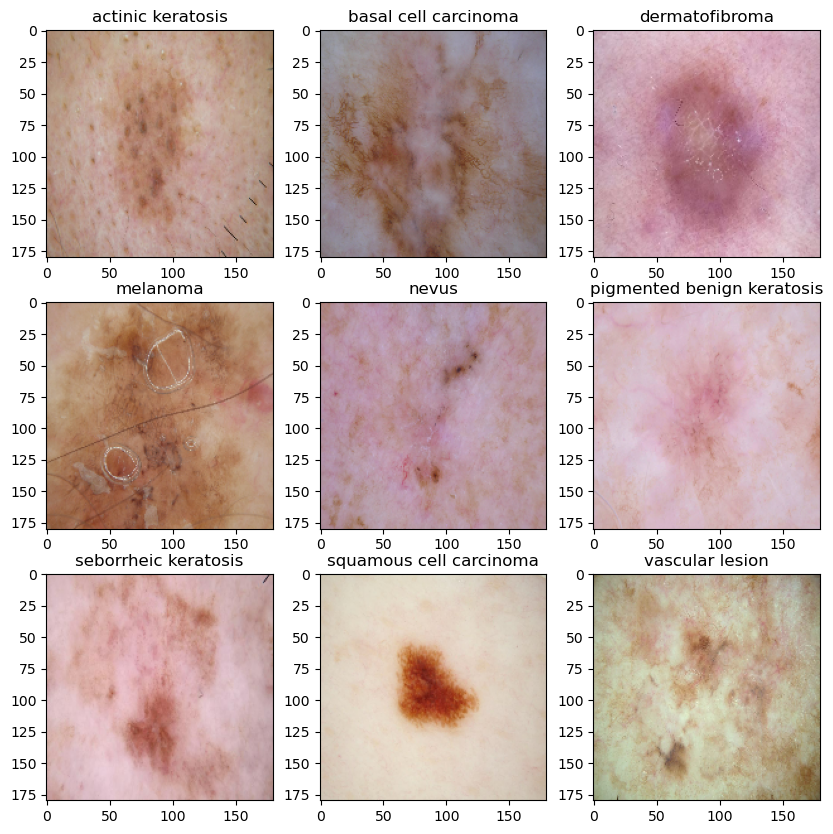

In [13]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10,10))
for x, y in train_ds.take(1):
  print(x)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.asarray(x[i],dtype="int32"))
    plt.title(class_names[i])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
### Your code goes here
num_classes =9
model = Sequential()
#rescaling
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
#layer 1
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


#layer4
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer5
model.add(Conv2D(256,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 90, 90, 64)        0         
                                                        

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 90, 90, 64)        0         
                                                        

In [19]:
!pip3 install plot_model

In [20]:
from keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, mode='auto')

### Train the model

In [21]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose = 1
)

Epoch 1/20


2023-08-16 17:23:54.594267: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 73 of 1000
2023-08-16 17:24:04.615068: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 133 of 1000
2023-08-16 17:24:09.013269: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


169/169 [==============================] - 331s 2s/step - loss: 1.8099 - accuracy: 0.3359 - val_loss: 2.0993 - val_accuracy: 0.2339
Epoch 2/20
169/169 [==============================] - 317s 2s/step - loss: 1.4815 - accuracy: 0.4546 - val_loss: 1.9452 - val_accuracy: 0.2910
Epoch 3/20
169/169 [==============================] - 353s 2s/step - loss: 1.3136 - accuracy: 0.5106 - val_loss: 1.6723 - val_accuracy: 0.3630
Epoch 4/20
169/169 [==============================] - 329s 2s/step - loss: 1.1491 - accuracy: 0.5862 - val_loss: 1.1812 - val_accuracy: 0.5605
Epoch 5/20
169/169 [==============================] - 304s 2s/step - loss: 0.9534 - accuracy: 0.6515 - val_loss: 1.3938 - val_accuracy: 0.5427
Epoch 6/20
169/169 [==============================] - 315s 2s/step - loss: 0.8241 - accuracy: 0.6942 - val_loss: 6.3369 - val_accuracy: 0.2613
Epoch 7/20
169/169 [==============================] - 307s 2s/step - loss: 0.6940 - accuracy: 0.7550 - val_loss: 1.2361 - val_accuracy: 0.6184
Epoch 8/20

**As observed previously, it's evident that the model is exhibiting overfitting. To address this issue, we will explore the implementation of data augmentation techniques.**

### Visualizing training results

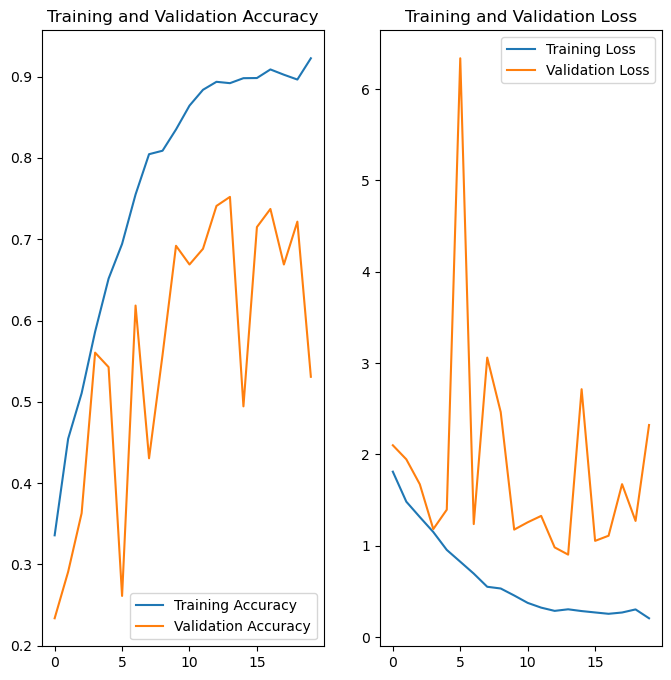

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    seed=123
)

loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)
loss_t, accuracy_t = model.evaluate(test_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)
print("Testing_Accuracy: ", accuracy_t)
print("testing Loss", loss_t)

Found 118 files belonging to 9 classes.
4/4 [==============================] - 6s 434ms/step - loss: 5.1263 - accuracy: 0.3136
Accuracy:  0.6435459852218628
Validation Accuracy:  0.530809223651886
Loss:  1.3401665687561035
Validation Loss 2.3210997581481934
Testing_Accuracy:  0.31355932354927063
testing Loss 5.12626314163208


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

**The outcomes presented earlier unequivocally indicate a significant occurrence of overfitting within the model.**

**Furthermore, the plot allows us to deduce that the loss exhibits a noticeable increase after 20 epochs, necessitating efforts to minimize this escalation.**

### Applying Data Augmentation Strategy

**It is essential to adhere to practices such as image resizing, rotation, and zooming, among others.**

In [24]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        shear_range=0.2,
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        fill_mode='nearest',  # randomly flip images
        validation_split=0.2)

datagen_val = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        shear_range=0.2,
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        fill_mode='nearest', # randomly flip images
        validation_split=0.2)

train_ds_generator = datagen_train.flow_from_directory(
    data_dir_train,
    target_size=(img_height, img_width),
    classes=class_names,
    batch_size=32,
    color_mode='rgb',
    subset='training')

validation_ds_generator = datagen_val.flow_from_directory(
    data_dir_train,
    target_size=(img_height, img_width),
    classes=class_names,
    batch_size=32,
    color_mode='rgb',
    subset='validation')

Found 5395 images belonging to 9 classes.


/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1469: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn(


Found 1344 images belonging to 9 classes.


### Todo:
### Create the model, compile and train the model

**We will apply the same set of model creation parameters as before, but this time, we will integrate additional dropout techniques to address overfitting concerns.**


In [29]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

num_classes =9
model_gen = Sequential()
#rescaling
model_gen.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
#layer 1
model_gen.add(Conv2D(32, (3, 3), padding='same'))
model_gen.add(Activation('relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))

#layer 2
model_gen.add(Conv2D(64, (3, 3), padding='same'))
model_gen.add(Activation('relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.25))

#layer4
model_gen.add(Conv2D(128,(3,3), padding='same'))
model_gen.add(Activation('relu'))
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.4))

#layer5
model_gen.add(Conv2D(256,(3,3), padding='same'))
model_gen.add(Activation('relu'))
model_gen.add(BatchNormalization())
model_gen.add(MaxPooling2D(pool_size=(2, 2)))
model_gen.add(Dropout(0.4))


model_gen.add(Flatten())
model_gen.add(Dense(512))
model_gen.add(Activation('relu'))
model_gen.add(Dropout(0.4))
model_gen.add(Dense(num_classes))
model_gen.add(Activation('softmax'))

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here



### Compiling the model

In [30]:
## Your code goes here

### Todo, choose an appropirate optimiser and loss function
model_gen.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [31]:
## Your code goes here, note: train your model for 20 epochs
## Your code goes here, note: train your model for 20 epochs
import scipy
history = model_gen.fit(
    train_ds_generator,
    validation_data= validation_ds_generator,
    epochs=20,
    verbose=1)

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 133s 2s/step - loss: 2.0754 - accuracy: 0.1955 - val_loss: 2.0689 - val_accuracy: 0.1689
Epoch 2/20
57/57 [==============================] - 129s 2s/step - loss: 2.0493 - accuracy: 0.1755 - val_loss: 2.0222 - val_accuracy: 0.2072
Epoch 3/20
57/57 [==============================] - 126s 2s/step - loss: 2.0387 - accuracy: 0.1905 - val_loss: 2.0235 - val_accuracy: 0.2072
Epoch 4/20
57/57 [==============================] - 124s 2s/step - loss: 2.0355 - accuracy: 0.1838 - val_loss: 2.0255 - val_accuracy: 0.1959
Epoch 5/20
57/57 [==============================] - 123s 2s/step - loss: 2.0437 - accuracy: 0.2033 - val_loss: 2.0303 - val_accuracy: 0.2072
Epoch 6/20
57/57 [==============================] - 122s 2s/step - loss: 2.0383 - accuracy: 0.1944 - val_loss: 2.0295 - val_accuracy: 0.2072
Epoch 7/20
57/57 [==============================] - 125s 2s/step - loss: 2.0318 - accuracy: 0.1933 - val_loss: 2.0161 - val_accuracy: 0.2072
Epoch 8/20
57

### Visualizing the results

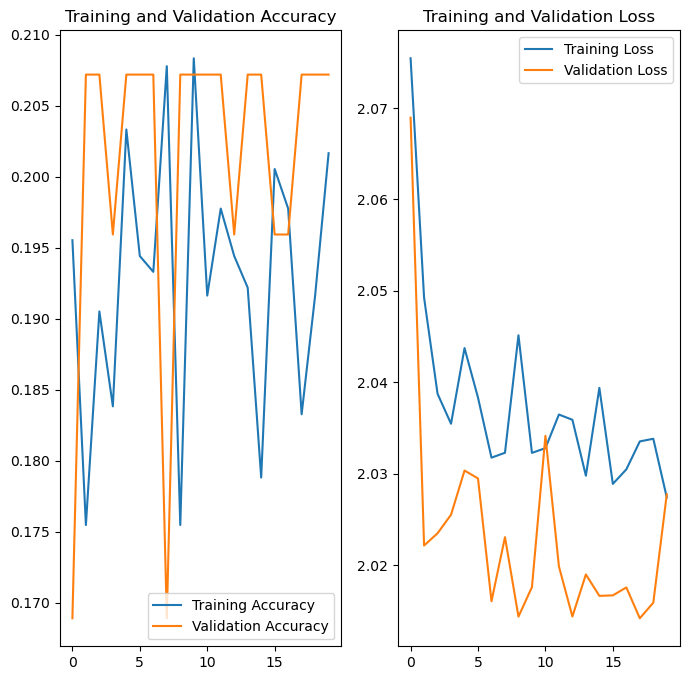

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
loss, accuracy = model_gen.evaluate(train_ds_generator, verbose=1,)
loss_v, accuracy_v = model_gen.evaluate(validation_ds_generator, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 14s 995ms/step - loss: 2.0278 - accuracy: 0.2072
Accuracy:  0.20612813532352448
Validation Accuracy:  0.20720720291137695
Loss:  2.033510208129883
Validation Loss 2.027756452560425


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Based on the findings presented earlier, it is evident that incorporating dropouts or utilizing data resizing augmentation did not result in notable improvements. In fact, the loss experienced a slight increase.**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [34]:
## Your code goes here.
num=[]
train_path = data_dir_train
for label in class_names:
    path = train_path/label
    print(path)
    folder_data = len(list(path.glob('*.jpg')))
    num.append(folder_data)
    print('there are ', folder_data,' images in ', label, 'class')

/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
there are  114  images in  actinic keratosis class
/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma
there are  376  images in  basal cell carcinoma class
/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
there are  95  images in  dermatofibroma class
/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma
there are  438  images in  melanoma class
/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin I

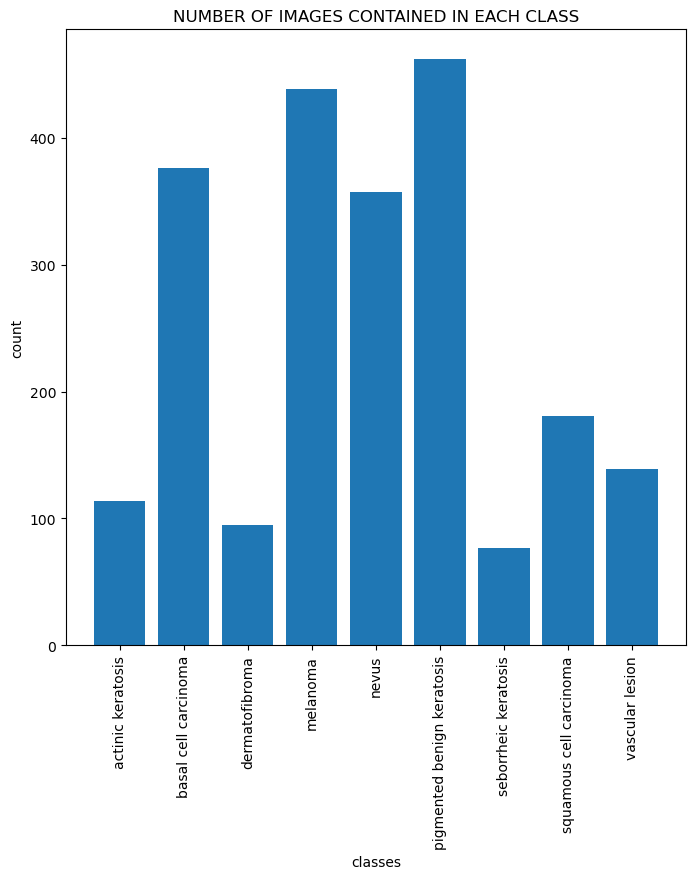

In [35]:
plt.figure(figsize = (8,8))
plt.bar(class_names, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
**-Seborrheic keratosis**
#### - Which classes dominate the data in terms proportionate number of samples?
**-Pigmented benign keratosis**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [36]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [37]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset/i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CCC91FF50>: 100%|█| 500/500 [00:10<00:00, 47


Initialised with 376 image(s) found.
Output directory set to /home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CCC3B2D10>: 100%|█| 500/500 [00:10<00:00, 46


Initialised with 95 image(s) found.
Output directory set to /home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6CCCB673D0>: 100%|█| 500/50


Initialised with 438 image(s) found.
Output directory set to /home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6CCCA46ED0>: 100%|█| 500/5


Initialised with 357 image(s) found.
Output directory set to /home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F6CCCA58290>: 100%|█| 500/500 [00:56<00:00, 


Initialised with 462 image(s) found.
Output directory set to /home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CCD62A350>: 100%|█| 500/500 [00:11<00:00, 43


Initialised with 77 image(s) found.
Output directory set to /home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F6CCC4DE990>: 100%|█| 500/500 [00:25<00:00, 1


Initialised with 181 image(s) found.
Output directory set to /home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CCC472D10>: 100%|█| 500/500 [00:12<00:00, 41


Initialised with 139 image(s) found.
Output directory set to /home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CCCB6AAD0>: 100%|█| 500/500 [00:12<00:00, 41


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [38]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [39]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_16b7ba44-b627-460d-98ac-03b8afd4fa3a.jpg',
 '/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_47b7ae2d-026b-464a-8a7e-30b986cf689c.jpg',
 '/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_51584d5d-3464-4f25-95f4-9256081b6b09.jpg',
 '/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratos

In [42]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [43]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [44]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [45]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

### Lets see the distribution of augmented data after adding new images to the original training data.

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [46]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [49]:
data_dir_train= pathlib.Path("/home/abhishektiwari/abhishekdoc/gitWork/Melanoma-Detection-Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

train_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [50]:
val_ds_bal = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [51]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
### Your code goes here
num_classes =9
model_bal = Sequential()
# #rescaling
# model_bal.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
#layer 1
model_bal.add(Conv2D(32, (3, 3), padding='same',input_shape=(180, 180, 3)))
model_bal.add(Activation('relu'))
model_bal.add(BatchNormalization())
model_bal.add(MaxPooling2D(pool_size=(2, 2)))


#layer 2
model_bal.add(Conv2D(64, (3, 3), padding='same'))
model_bal.add(Activation('relu'))
model_bal.add(BatchNormalization())
model_bal.add(MaxPooling2D(pool_size=(2, 2)))
model_bal.add(Dropout(0.4))


#layer4
model_bal.add(Conv2D(128,(3,3), padding='same'))
model_bal.add(Activation('relu'))
model_bal.add(BatchNormalization())
model_bal.add(MaxPooling2D(pool_size=(2, 2)))
model_bal.add(Dropout(0.4))


#layer5
model_bal.add(Conv2D(256,(3,3), padding='same'))
model_bal.add(Activation('relu'))
model_bal.add(BatchNormalization())
model_bal.add(MaxPooling2D(pool_size=(2, 2)))
model_bal.add(Dropout(0.4))


model_bal.add(Flatten())
model_bal.add(Dense(512))
model_bal.add(Activation('relu'))
model_bal.add(BatchNormalization())
model_bal.add(Dropout(0.4))
model_bal.add(Dense(num_classes))
model_bal.add(Activation('softmax'))

In [52]:
model_bal.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 batch_normalization_2 (Bat  (None, 180, 180, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 activation_13 (Activation)  (None, 90, 90, 64)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [53]:
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import ReduceLROnPlateau
# from keras.utils.np_utils import to_categorical

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False)

model_bal.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

#### **Todo:**  Train your model

In [54]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=5, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

history = model_bal.fit(
    train_ds_bal,
    validation_data= val_ds_bal,
    epochs=50,
    callbacks=[learning_rate_reduction])

Epoch 1/50
169/169 [==============================] - 430s 3s/step - loss: 1.8267 - accuracy: 0.3982 - val_loss: 3.2050 - val_accuracy: 0.3274 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 426s 3s/step - loss: 1.4437 - accuracy: 0.4866 - val_loss: 4.6919 - val_accuracy: 0.3363 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 461s 3s/step - loss: 1.3293 - accuracy: 0.5349 - val_loss: 2.0049 - val_accuracy: 0.3697 - lr: 0.0010
Epoch 4/50
169/169 [==============================] - 431s 3s/step - loss: 1.0792 - accuracy: 0.6089 - val_loss: 1.0782 - val_accuracy: 0.6637 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 436s 3s/step - loss: 1.0575 - accuracy: 0.6193 - val_loss: 1.6585 - val_accuracy: 0.4707 - lr: 0.0010
Epoch 6/50
169/169 [==============================] - 439s 3s/step - loss: 0.9556 - accuracy: 0.6513 - val_loss: 1.4245 - val_accuracy: 0.5427 - lr: 0.0010
Epoch 7/50
169/169 [==============================] - 430s 3s/st

#### **Todo:**  Visualize the model results

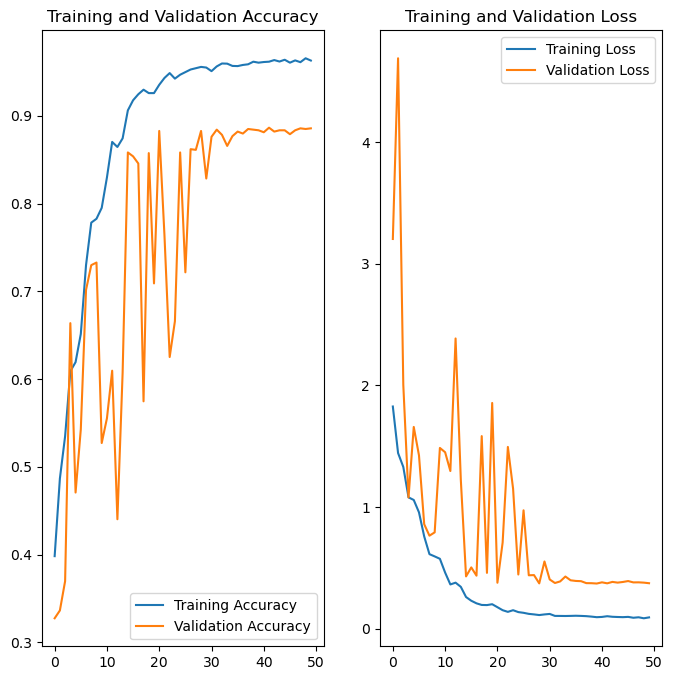

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 50
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

**The ultimate model demonstrates a balanced absence of underfitting or overfitting indications.**

**Balancing classes resulted in enhanced model performance across both training and validation datasets.**

**After 50 epochs, the final CNN model attains a commendable training accuracy of 96% and a validation accuracy of 88%.**

**The minimal disparity between training and validation accuracy is indicative of the final model's strong generalization ability.**

**Employing batch normalization and incorporating dropouts after each layer significantly contributed to reducing loss in both training and validation datasets.**


In [56]:
loss, accuracy = model_bal.evaluate(train_ds_bal, verbose=1,)
loss_v, accuracy_v = model_bal.evaluate(val_ds_bal, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 35s 795ms/step - loss: 0.3727 - accuracy: 0.8857
Accuracy:  0.9705118536949158
Validation Accuracy:  0.885671854019165
Loss:  0.06441713124513626
Validation Loss 0.3726765513420105
